In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv('./NormalizedWeatherData.csv',sep=';')

data.describe()


Date  Type de tendance barométrique  \
count  100659.000000                  100659.000000   
mean        0.498065                       0.540945   
std         0.289286                       0.338915   
min         0.000000                       0.000000   
25%         0.247250                       0.250000   
50%         0.497250                       0.500000   
75%         0.750000                       0.875000   
max         1.000000                       1.000000   

       Vitesse du vent moyen 10 mn       Humidité  \
count                100659.000000  100659.000000   
mean                      0.151609       0.727043   
std                       0.100956       0.195087   
min                       0.000000       0.000000   
25%                       0.081550       0.595960   
50%                       0.128760       0.767680   
75%                       0.201720       0.888890   
max                       1.000000       1.000000   

       Variation de pression en 24 heures  \
count                       100659.000000   
mean                             0.480349   
std                              0.098096   
min                              0.000000   
25%                              0.422780   
50%                              0.478760   
75%                              0.534750   
max                              1.000000   

       Rafale sur les 10 dernières minutes  \
count                        100659.000000   
mean                              0.158559   
std                               0.101743   
min                               0.000000   
25%                               0.084030   
50%                               0.137250   
75%                               0.210080   
max                               1.000000   

       Précipitations dans les 24 dernières heures  Température (°C)  \
count                                100659.000000     100659.000000   
mean                                      0.014287          0.489141   
std                                       0.039848          0.146888   
min                                       0.000000          0.000000   
25%                                       0.000870          0.386740   
50%                                       0.000870          0.482500   
75%                                       0.006060          0.585640   
max                                       1.000000          1.000000   

            Latitude      Longitude       Altitude  
count  100659.000000  100659.000000  100659.000000  
mean        0.541388       0.492306       0.204036  
std         0.293842       0.240280       0.226570  
min         0.000000       0.000000       0.000000  
25%         0.255130       0.317470       0.048130  
50%         0.598920       0.487280       0.132370  
75%         0.835920       0.682860       0.280390  
max         1.000000       1.000000       1.000000

In [3]:
X = data.drop(['Température (°C)'], axis=1)
Y = data['Température (°C)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a random forest regressor

model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10, min_samples_split=2)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('accuracy: ', model.score(X_test, Y_test))


accuracy:  0.7937584378519896


In [4]:
for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

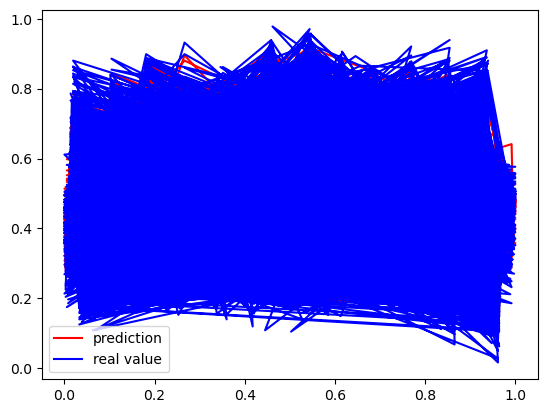

In [6]:
#plot the prediction and the real value as curves with the date as x axis abd the temperature as y axis

plt.plot(X_test['Date'], y_pred, color='red', label='prediction')
plt.plot(X_test['Date'], Y_test, color='blue', label='real value')
plt.legend()
plt.show()





In [8]:

import plotly.graph_objs as go
import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Date'], y=y_pred,mode='lines',name='prediction'))
fig.add_trace(go.Scatter(x=X_test['Date'], y=Y_test,mode='lines',name='real value'))
fig.show()
